## Kibot.com 월물별 데이터 다운로드 및 파일 생성
 * KibotAPI 이용
 * 과거 상품별 월물 OHLC 데이터 제공
 
 - Data/instruments.csv 에 등록된 kibot 상품에 대한 월물목록을
   kibot.com에서 다운로드하여 contracts_list.txt 파일로 저장

In [1]:
import sys
sys.path.append('..')
import requests
from collections import defaultdict
import csv
import h5py
import os
import numpy as np
import pandas as pd
import warnings


In [2]:
#del sys.modules['tools.common']
#del sys.modules['tools.instruments']
from tools.instruments import instruments
from tools.constants import DATADIR
from tools.common import monitor_memory

In [4]:
monitor_memory(dir())

[('np', 157), ('pd', 65), ('instruments', 6), ('DATADIR', 5), ('defaultdict', 4), ('monitor_memory', 3)]


In [3]:
REFPATH = os.path.join(DATADIR,'kibot/contracts-list.csv')
CONTRACTS_LIST_JSON_PATH = os.path.join(DATADIR,'kibot', 'contracts-list.json')
CONTRACTSPATH = os.path.join(DATADIR, 'kibot','futures-contracts.hdf')

### 1. Kibot에서 다운 가능한 종목 불러오기 

In [4]:
#kibot 에서 다운가능하고, 이베스트에서 매매가능한 종목 불러오기
items = instruments.filter(kibotall=True, tradable=True)

### 2. Kibot.com 서버에서 월물정보 다운로드

In [5]:
LoginURL = "http://api.kibot.com?action=login&user=guest&password=guest"
DataRequestURL = "http://www.kibot.com/Files/2/Futures_tickbidask.txt"
LogoutURL = "http://api.kibot.com?action=logout"

In [6]:
# http requests session 연결 후 종목별 다운로드
print("서버 접속 시작")
with requests.Session() as session:
    res = session.get(LoginURL)
    if res.status_code != 200:
        print(res.text)
        session.close()
        
    ret = session.get(DataRequestURL)

print("다운로드 완료")

서버 접속 시작
다운로드 완료


### 3. 월물정보 저장
* 상품별 월물을 시간 순으로 정리하여 파일로 저장
* 파일 경로: \data\kibot\contracts_list.csv

In [19]:
symbols = [item.kibot for item in items]
contracts_list = [[x.split('\t')[i] for i in [1,2,3,5]] for x in filter(bool, ret.text.splitlines()[6:])]
contracts_list = list(filter(lambda x: (x[0] in symbols) and (x[0]!=x[1]), contracts_list))
contracts_list.sort(key=lambda x: (x[0], int(x[1][-2:]), instruments.month_code(x[1][-3])))
#contracts = [row.insert(0, instruments.filter(kibot=row[0])[0].symbol) for row in contracts_list]

In [20]:
contracts_list

[['AD', 'ADM10', '4/2/2010', 'AUSTRALIAN DOLLAR JUNE 2010'],
 ['AD', 'ADU10', '4/1/2010', 'AUSTRALIAN DOLLAR SEPTEMBER 2010'],
 ['AD', 'ADZ10', '5/3/2010', 'AUSTRALIAN DOLLAR DECEMBER 2010'],
 ['AD', 'ADH11', '4/11/2010', 'AUSTRALIAN DOLLAR MARCH 2011'],
 ['AD', 'ADM11', '5/20/2010', 'AUSTRALIAN DOLLAR JUNE 2011'],
 ['AD', 'ADU11', '5/5/2010', 'AUSTRALIAN DOLLAR SEPTEMBER 2011'],
 ['AD', 'ADZ11', '9/30/2010', 'AUSTRALIAN DOLLAR DECEMBER 2011'],
 ['AD', 'ADH12', '6/23/2011', 'AUSTRALIAN DOLLAR MARCH 2012'],
 ['AD', 'ADM12', '5/11/2011', 'AUSTRALIAN DOLLAR JUNE 2012'],
 ['AD', 'ADU12', '5/4/2011', 'AUSTRALIAN DOLLAR SEPTEMBER 2012'],
 ['AD', 'ADZ12', '7/29/2011', 'AUSTRALIAN DOLLAR DECEMBER 2012'],
 ['AD', 'ADH13', '5/10/2012', 'AUSTRALIAN DOLLAR MARCH 2013'],
 ['AD', 'ADM13', '1/31/2012', 'AUSTRALIAN DOLLAR JUNE 2013'],
 ['AD', 'ADU13', '8/8/2012', 'AUSTRALIAN DOLLAR SEPTEMBER 2013'],
 ['AD', 'ADZ13', '8/1/2012', 'AUSTRALIAN DOLLAR DECEMBER 2013'],
 ['AD', 'ADH14', '9/25/2012', 'AUSTRAL

In [171]:
[instruments.filter(kibot=row[0])[0].symbol for row in contracts_list]

['AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',
 'BO',

In [144]:
fields = ['symbol', 'kibot', 'contract', 'startdate', 'name']
with open(REFPATH, 'w', newline='') as file:
    wr = csv.writer(file)
    wr.writerow(fields)
    wr.writerows(contracts)

Error: iterable expected, not NoneType

### 4. Kibot.com 서버에서 월물 OHLC 데이터 다운

In [97]:
kibots = defaultdict(list)
with open(REFPATH, 'r') as f:
    lines = csv.DictReader(f)
    for item in lines:
        kibots[item['kibot']].append(item['contract'])
    #symbols[item[0]].append(item[1])

In [98]:
LoginURL = "http://api.kibot.com?action=login&user=guest&password=guest"
DataRequestURL = "http://api.kibot.com"
LogoutURL = "http://api.kibot.com?action=logout"

In [99]:
#  연결선물일봉 데이터 다운용 쿼리
query={
    'action': 'history',
    'symbol': '',
    'interval': 'daily',
    'type': 'futures',
    'period': '99999',
    'timezone': 'utc'
}

In [105]:
# 저장할 DB파일 생성 및 그룹생성
file = h5py.File(CONTRACTSPATH, 'w')
for kibot in kibots.keys():
    file.create_group(instruments.filter(kibot=kibot)[0].symbol)

In [108]:
# numpy dtypes
dtypes= np.dtype([('date', 'i'), ('open', 'f'),('high','f'), ('low','f'), ('close','f'), ('volume', 'i'), ('open_interest','i')])

In [109]:
# http requests session 연결 후 종목별 다운로드
print("서버 접속 시작")
with requests.Session() as session:
    res = session.get(LoginURL)
    if res.status_code != 200:
        print(res.text)
        session.close()
        
    for kibot, contracts in kibots.items():
        for contract in contracts:
            print(f"{contract} 다운로드...")
            query['symbol'] = contract
            ret = session.get("http://api.kibot.com", params=query)
            
            if ret.status_code != 200:
                print(ret.text)
                session.close()
            
            datalist = []    
            for line in ret.text.splitlines():
                quote = line.split(',')
                date = quote[0].split('/')
                date=np.datetime64('-'.join([date[2],date[0],date[1]])).astype('M8[D]').astype('i')
                datalist.append((date,quote[1],quote[2],quote[3],quote[4],quote[5],'0'))
            symbol = instruments.filter(kibot=kibot)[0].symbol
            file[symbol].create_dataset(contract, data=np.array(datalist, dtypes))
file.close()
print("다운로드 완료")

서버 접속 시작
ADM10 다운로드...
ADU10 다운로드...
ADZ10 다운로드...
ADH11 다운로드...
ADM11 다운로드...
ADU11 다운로드...
ADZ11 다운로드...
ADH12 다운로드...
ADM12 다운로드...
ADU12 다운로드...
ADZ12 다운로드...
ADH13 다운로드...
ADM13 다운로드...
ADU13 다운로드...
ADZ13 다운로드...
ADH14 다운로드...
ADM14 다운로드...
ADU14 다운로드...
ADZ14 다운로드...
ADH15 다운로드...
ADM15 다운로드...
ADU15 다운로드...
ADZ15 다운로드...
ADH16 다운로드...
ADM16 다운로드...
ADU16 다운로드...
ADZ16 다운로드...
ADH17 다운로드...
ADJ17 다운로드...
ADK17 다운로드...
ADM17 다운로드...
ADN17 다운로드...
ADQ17 다운로드...
ADU17 다운로드...
ADV17 다운로드...
ADX17 다운로드...
ADZ17 다운로드...
ADF18 다운로드...
ADG18 다운로드...
ADH18 다운로드...
ADJ18 다운로드...
ADK18 다운로드...
ADM18 다운로드...
ADN18 다운로드...
ADQ18 다운로드...
ADU18 다운로드...
ADV18 다운로드...
ADX18 다운로드...
ADZ18 다운로드...
ADF19 다운로드...
ADG19 다운로드...
ADH19 다운로드...
ADJ19 다운로드...
ADK19 다운로드...
ADM19 다운로드...
ADN19 다운로드...
ADQ19 다운로드...
ADU19 다운로드...
ADV19 다운로드...
ADX19 다운로드...
ADZ19 다운로드...
ADF20 다운로드...
ADG20 다운로드...
ADH20 다운로드...
ADJ20 다운로드...
ADK20 다운로드...
ADM20 다운로드...
ADN20 다운로드...
ADQ20 다운로드...
ADU20 다운로드...
ADV20 다운로드.

CLU19 다운로드...
CLV19 다운로드...
CLX19 다운로드...
CLZ19 다운로드...
CLF20 다운로드...
CLG20 다운로드...
CLH20 다운로드...
CLJ20 다운로드...
CLK20 다운로드...
CLM20 다운로드...
CLN20 다운로드...
CLQ20 다운로드...
CLU20 다운로드...
CLV20 다운로드...
CLX20 다운로드...
CLZ20 다운로드...
CLF21 다운로드...
CLG21 다운로드...
CLH21 다운로드...
CLJ21 다운로드...
CLK21 다운로드...
CLM21 다운로드...
CLN21 다운로드...
CLQ21 다운로드...
CLU21 다운로드...
CLV21 다운로드...
CLX21 다운로드...
CLZ21 다운로드...
CLF22 다운로드...
CLG22 다운로드...
CLH22 다운로드...
CLJ22 다운로드...
CLK22 다운로드...
CLM22 다운로드...
CLN22 다운로드...
CLQ22 다운로드...
CLU22 다운로드...
CLV22 다운로드...
CLX22 다운로드...
CLZ22 다운로드...
CLF23 다운로드...
CLG23 다운로드...
CLH23 다운로드...
CLJ23 다운로드...
CLK23 다운로드...
CLM23 다운로드...
CLN23 다운로드...
CLQ23 다운로드...
CLU23 다운로드...
CLV23 다운로드...
CLX23 다운로드...
CLZ23 다운로드...
CLF24 다운로드...
CLG24 다운로드...
CLH24 다운로드...
CLJ24 다운로드...
CLK24 다운로드...
CLM24 다운로드...
CLN24 다운로드...
CLU24 다운로드...
CLX24 다운로드...
CLZ24 다운로드...
CLF25 다운로드...
CLJ25 다운로드...
CLM25 다운로드...
CLU25 다운로드...
CLZ25 다운로드...
CLF26 다운로드...
CLG26 다운로드...
CLM26 다운로드...
CLZ26 다운로드...
CLF27 

HEJ21 다운로드...
HEK21 다운로드...
HEM21 다운로드...
HEN21 다운로드...
HEQ21 다운로드...
HEV21 다운로드...
HEZ21 다운로드...
HEG22 다운로드...
HEJ22 다운로드...
HEK22 다운로드...
HEM22 다운로드...
HEN22 다운로드...
HEQ22 다운로드...
HEV22 다운로드...
HEZ22 다운로드...
HEG23 다운로드...
HEJ23 다운로드...
HEK23 다운로드...
HEM23 다운로드...
HEN23 다운로드...
HGJ10 다운로드...
HGK10 다운로드...
HGM10 다운로드...
HGN10 다운로드...
HGQ10 다운로드...
HGU10 다운로드...
HGV10 다운로드...
HGX10 다운로드...
HGZ10 다운로드...
HGF11 다운로드...
HGG11 다운로드...
HGH11 다운로드...
HGJ11 다운로드...
HGK11 다운로드...
HGM11 다운로드...
HGN11 다운로드...
HGQ11 다운로드...
HGU11 다운로드...
HGV11 다운로드...
HGX11 다운로드...
HGZ11 다운로드...
HGF12 다운로드...
HGG12 다운로드...
HGH12 다운로드...
HGJ12 다운로드...
HGK12 다운로드...
HGM12 다운로드...
HGN12 다운로드...
HGQ12 다운로드...
HGU12 다운로드...
HGV12 다운로드...
HGX12 다운로드...
HGZ12 다운로드...
HGF13 다운로드...
HGG13 다운로드...
HGH13 다운로드...
HGJ13 다운로드...
HGK13 다운로드...
HGM13 다운로드...
HGN13 다운로드...
HGQ13 다운로드...
HGU13 다운로드...
HGV13 다운로드...
HGX13 다운로드...
HGZ13 다운로드...
HGF14 다운로드...
HGG14 다운로드...
HGH14 다운로드...
HGJ14 다운로드...
HGK14 다운로드...
HGM14 다운로드...
HGN14 

NGM24 다운로드...
NGN24 다운로드...
NGQ24 다운로드...
NGU24 다운로드...
NGV24 다운로드...
NGX24 다운로드...
NGZ24 다운로드...
NGF25 다운로드...
NGG25 다운로드...
NGH25 다운로드...
NGJ25 다운로드...
NGK25 다운로드...
NGM25 다운로드...
NGN25 다운로드...
NGQ25 다운로드...
NGU25 다운로드...
NGV25 다운로드...
NGX25 다운로드...
NGZ25 다운로드...
NGF26 다운로드...
NGG26 다운로드...
NGH26 다운로드...
NGJ26 다운로드...
NGK26 다운로드...
NGM26 다운로드...
NGN26 다운로드...
NGQ26 다운로드...
NGU26 다운로드...
NGV26 다운로드...
NGX26 다운로드...
NGZ26 다운로드...
NGF27 다운로드...
NGG27 다운로드...
NGH27 다운로드...
NGJ27 다운로드...
NGK27 다운로드...
NGM27 다운로드...
NGN27 다운로드...
NGQ27 다운로드...
NGU27 다운로드...
NGV27 다운로드...
NGX27 다운로드...
NGZ27 다운로드...
NGF28 다운로드...
NGG28 다운로드...
NGH28 다운로드...
NGJ28 다운로드...
NGK28 다운로드...
NGM28 다운로드...
NGN28 다운로드...
NGQ28 다운로드...
NGU28 다운로드...
NGV28 다운로드...
NGV29 다운로드...
NGV30 다운로드...
NKDM10 다운로드...
NKDU10 다운로드...
NKDZ10 다운로드...
NKDH11 다운로드...
NKDM11 다운로드...
NKDU11 다운로드...
NKDZ11 다운로드...
NKDH12 다운로드...
NKDM12 다운로드...
NKDU12 다운로드...
NKDZ12 다운로드...
NKDH13 다운로드...
NKDM13 다운로드...
NKDU13 다운로드...
NKDZ13 다운로드...
NKDH1

RTYU19 다운로드...
RTYZ19 다운로드...
RTYH20 다운로드...
RTYM20 다운로드...
RTYU20 다운로드...
RTYZ20 다운로드...
RTYH21 다운로드...
RTYM21 다운로드...
RTYU21 다운로드...
RTYZ21 다운로드...
RTYH22 다운로드...
RTYM22 다운로드...
RTYU22 다운로드...
SK10 다운로드...
SN10 다운로드...
SQ10 다운로드...
SU10 다운로드...
SX10 다운로드...
SF11 다운로드...
SH11 다운로드...
SK11 다운로드...
SN11 다운로드...
SQ11 다운로드...
SU11 다운로드...
SX11 다운로드...
SF12 다운로드...
SH12 다운로드...
SK12 다운로드...
SN12 다운로드...
SQ12 다운로드...
SU12 다운로드...
SX12 다운로드...
SF13 다운로드...
SH13 다운로드...
SK13 다운로드...
SN13 다운로드...
SQ13 다운로드...
SU13 다운로드...
SX13 다운로드...
SF14 다운로드...
SH14 다운로드...
SK14 다운로드...
SN14 다운로드...
SQ14 다운로드...
SU14 다운로드...
SX14 다운로드...
SF15 다운로드...
SH15 다운로드...
SK15 다운로드...
SN15 다운로드...
SQ15 다운로드...
SU15 다운로드...
SX15 다운로드...
SF16 다운로드...
SH16 다운로드...
SK16 다운로드...
SN16 다운로드...
SQ16 다운로드...
SU16 다운로드...
SX16 다운로드...
SF17 다운로드...
SH17 다운로드...
SK17 다운로드...
SN17 다운로드...
SQ17 다운로드...
SU17 다운로드...
SX17 다운로드...
SF18 다운로드...
SH18 다운로드...
SK18 다운로드...
SN18 다운로드...
SQ18 다운로드...
SU18 다운로드...
SX18 다운로드...
SF19 다운로드...

USU22 다운로드...
VXJ10 다운로드...
VXK10 다운로드...
VXM10 다운로드...
VXN10 다운로드...
VXQ10 다운로드...
VXU10 다운로드...
VXV10 다운로드...
VXX10 다운로드...
VXZ10 다운로드...
VXF11 다운로드...
VXG11 다운로드...
VXH11 다운로드...
VXJ11 다운로드...
VXK11 다운로드...
VXM11 다운로드...
VXN11 다운로드...
VXQ11 다운로드...
VXU11 다운로드...
VXV11 다운로드...
VXX11 다운로드...
VXZ11 다운로드...
VXF12 다운로드...
VXG12 다운로드...
VXH12 다운로드...
VXJ12 다운로드...
VXK12 다운로드...
VXM12 다운로드...
VXN12 다운로드...
VXQ12 다운로드...
VXU12 다운로드...
VXV12 다운로드...
VXX12 다운로드...
VXZ12 다운로드...
VXF13 다운로드...
VXG13 다운로드...
VXH13 다운로드...
VXJ13 다운로드...
VXK13 다운로드...
VXM13 다운로드...
VXN13 다운로드...
VXQ13 다운로드...
VXU13 다운로드...
VXV13 다운로드...
VXX13 다운로드...
VXZ13 다운로드...
VXF14 다운로드...
VXG14 다운로드...
VXH14 다운로드...
VXJ14 다운로드...
VXK14 다운로드...
VXM14 다운로드...
VXN14 다운로드...
VXQ14 다운로드...
VXU14 다운로드...
VXV14 다운로드...
VXX14 다운로드...
VXZ14 다운로드...
VXF15 다운로드...
VXG15 다운로드...
VXH15 다운로드...
VXJ15 다운로드...
VXK15 다운로드...
VXM15 다운로드...
VXN15 다운로드...
VXQ15 다운로드...
VXU15 다운로드...
VXV15 다운로드...
VXX15 다운로드...
VXZ15 다운로드...
VXF16 다운로드...
VXG16 

In [110]:
file.close()

### 5. 데이터 검증

In [180]:
from tools import ohlc_chart, view

In [185]:
file = h5py.File(CONTRACTSPATH, 'r')

In [186]:
file.keys()

<KeysViewHDF5 ['AD', 'BO', 'BP', 'C', 'CD', 'CL', 'EC', 'ES', 'FV', 'GC', 'HG', 'JY', 'LE', 'LN', 'MD', 'NE', 'NG', 'NK', 'NQ', 'O', 'PA', 'PL', 'RR', 'RTY', 'S', 'SF', 'SI', 'SM', 'TU', 'TY', 'US', 'VX', 'W', 'YM']>

In [182]:
# 참고 월물
ad = file['EC']['EUM20'][:]
ad = pd.DataFrame(ad)
ad['date'] = ad['date'].astype('M8[D]')
ad.set_index('date', inplace=True)

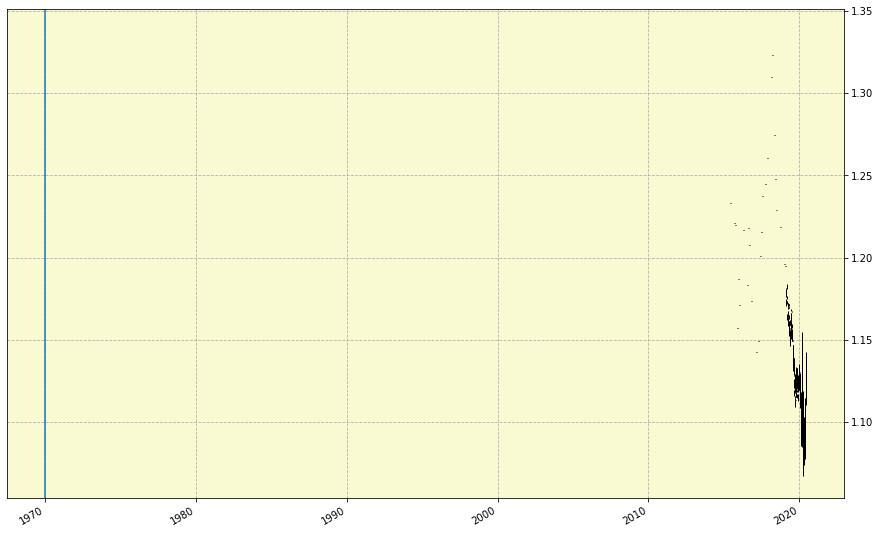

In [187]:
import matplotlib.pyplot as plt
view(ad['2010-02-01':], period='day', size=(15,10),)
plt.axvline(x=1)

In [184]:
file.close()

In [ ]:
row